In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
seq = get_standardized_measures('results/sequential_100.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr_100.csv', excluded_columns=['P_DEGREE'])

In [4]:
data

,P_DEGREE,READING,HUFFBUILD,ENCODING,WRITING,TOTAL
0,1,116624480,65877,119121392,184729287,420541036
1,1,121870923,68924,119357839,160169769,401467455
2,1,116468101,65153,118847648,160120190,395501092
3,1,116420117,66409,118767202,160528004,395781732
4,1,115948081,64776,119295840,160138503,395447200
...,...,...,...,...,...,...
95,20,10449582,64253,124944301,160998991,296457127
96,20,10608817,63848,120570911,162480819,293724395
97,20,10281469,64736,123390054,161761274,295497533
98,20,10637471,64177,120871703,159834810,291408161


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

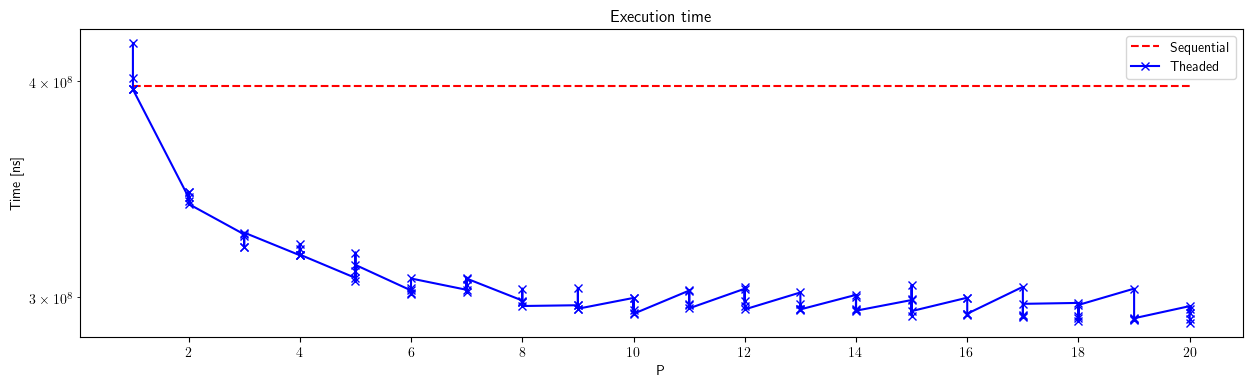

In [6]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
plt.yscale('log')
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [7]:
import pandas as pd

In [8]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).mean()

In [9]:
sp_data

,P_DEGREE,READING,HUFFBUILD,ENCODING,WRITING,TOTAL
0,1,117466340.4,66227.8,119077984.2,165137150.6,401747703.0
1,2,60249118.8,66065.4,121176740.2,161184054.2,342675978.6
2,3,40553819.0,64957.8,121863404.0,161459286.2,323941467.0
3,4,31973572.4,67270.6,124597953.0,162091334.8,318730130.8
4,5,25938790.4,65165.4,122204865.8,163076687.2,311285508.8
5,6,21798465.0,66962.6,121343536.6,160148986.0,303357950.2
6,7,19012046.2,65101.6,123585229.0,162367220.6,305029597.4
7,8,16837564.8,70828.6,121713087.4,160263706.4,298885187.2
8,9,15356563.6,66934.4,121767494.6,160445751.8,297636744.4
9,10,14001550.0,63974.8,121460924.0,160824008.8,296350457.6


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [10]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [11]:
sp_data

,P_DEGREE,READING,HUFFBUILD,ENCODING,WRITING,TOTAL,S_p
0,1,117466340.4,66227.8,119077984.2,165137150.6,401747703.0,0.988421
1,2,60249118.8,66065.4,121176740.2,161184054.2,342675978.6,1.158808
2,3,40553819.0,64957.8,121863404.0,161459286.2,323941467.0,1.225826
3,4,31973572.4,67270.6,124597953.0,162091334.8,318730130.8,1.245868
4,5,25938790.4,65165.4,122204865.8,163076687.2,311285508.8,1.275664
5,6,21798465.0,66962.6,121343536.6,160148986.0,303357950.2,1.309001
6,7,19012046.2,65101.6,123585229.0,162367220.6,305029597.4,1.301827
7,8,16837564.8,70828.6,121713087.4,160263706.4,298885187.2,1.328590
8,9,15356563.6,66934.4,121767494.6,160445751.8,297636744.4,1.334163
9,10,14001550.0,63974.8,121460924.0,160824008.8,296350457.6,1.339953


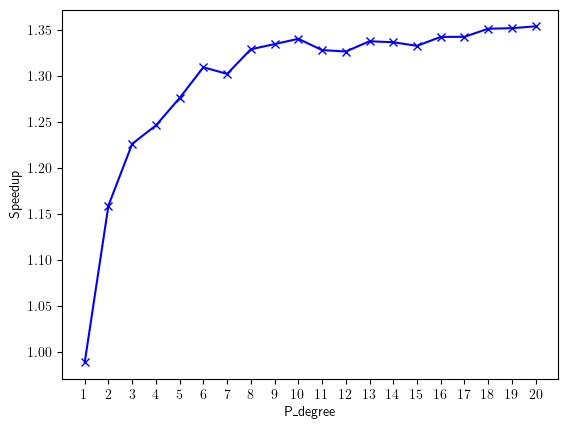

In [12]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Speedup')

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], 'x-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [13]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    401747703.0
Name: TOTAL, dtype: float64

In [14]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


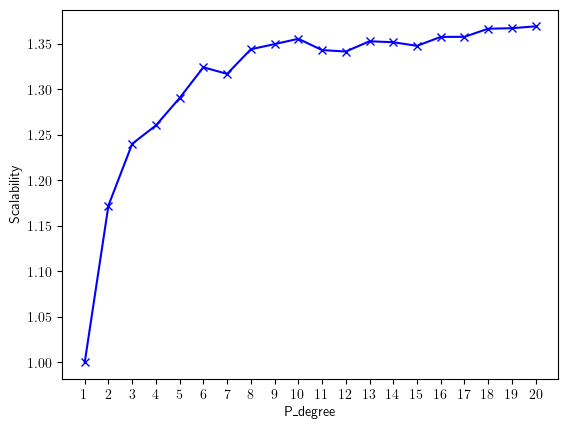

In [15]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')